****
<a id='lesson-3'></a>
# Module:  Integration
## Name: Tarun Hariharan
## Roll Number: 2024113009
****

Computing integrals (numerically) is an important task in many computational fields. In this tutorial we will explore two schemes:
- finite difference schemes / grid schemes
- Monte Carlo scheme

Scipy has 'integrate' function: learn its usage to compuate the 'exact' value of the integral


## Grid schemes
Typically used for 1-D or 2-D integrals, by evaluating the value of the function on a regular grid and then using approximation schemes like 'trapezoidal rule'

## Task-1
Following are the sub-tasks
- Write a function that takes as input a *function* and interval, and returns the value of the integral. Assume the fuction to be one-dimensional function
- Using the above function, find the area of a unit circle



## Task-2
 Exploratory task: Adaptive grid size. When the function changes 'too fast', then next grid point is 'closer' (and change is 'too slow', then next grid point is 'farther'). Using thisi adaptive scheme compute the area of unit circle.



## Monte Carlo methods
Monte Carlo methods are typically used when we have very large dimensional integrals.

## Task-3: Compute the area of the quarter unit circle (1st quadrant)  using <span style='color:red'> simple </span> Monte Carlo method


## Task-4
Simple Monte Carlo is almost never used; here is the 'theory' for a more proper usage...

Let us consider an integral:
$$ I = \int_a^b f(x)~dx$$
where $x\in \mathcal{R}^N$. Such multi-dimensional integrals occur in physics, chemistry, all branches of engineering, and one standard technique is to use Monte Carlo sampling. Below is a rather short presenation of connection between sampling and such integrals

### Multi-dimensional integrals using Monte Carlo sampling

$$I = \int_a^b dx~f(x) = \int_a^b dx~\rho(x) \left( \frac{f(x)}{\rho(x)}\right) =\int_a^b \rho(x)~g(x)~dx $$
with the restriction that $\rho(x)\ne0\forall x\in[a,b]$, and $g(x)={f(x)}/{\rho(x)}$.  

When the fuction $\rho(x)$ statisfies the following conditions:
1. $\rho(x) \ge 0~\forall~x\in[a,b]$
2. $\int_a^b dx~\rho(x) = 1$

such a function can be considered a probability density function.

When $\rho(x)$ is a probability density function,
$$ I = \int_a^b \rho(x)~g(x)~dx = \mathbb{E}_{x\sim\rho}~g(x)= \text{average value of } g(x) \text{ with } x \text{ sampled with probability density }\rho(x)$$
The power of the Monte Carlo method comes from the flexibility in the choice of $\rho(x)$. If $\rho(x)$ is so chosen that it is also large when $|f(x)|$ is large and $\rho(x)$ is small when $|f(x)|$ is small, the efficiency of computing the integral is great. In a proper statistics course, this is demostrated by showing that the variance of computation decreases; this will not be attempted here. The 'Monte Carlo' in the name comes from the fact that random sampling of $x$ with probability density $\rho(x)$; gambling in casinos rely heavily on random numbers.

### Task 4.1: Compute area of circle with $\rho(x)=\text{constant}$



### Task 4.2: Compute the are of the circle with $\rho(x)$ being the Gaussian distribution (i.e. normal distribution)



## Task-5 One simple measure of efficiency of computation

What is possible is to check that the efficiency of computation: how 'fast' is the computation? Smaller is the number of function evaluations used, greater is the efficiency. Alternatively, for the same number of function evaluations, lower error would mean greater efficiency.

Compute the graph of $N$ vs $error(N)$ where $N$ is the number of function computations, under various schemes listed below:
1. Naive Monte Carlo
2. Importance Sampling with uniform  distrituion
3. Importance Sampling with Gaussian districutuion



# WORKBOOK STARTS from here

In [159]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt
from scipy import stats

# Grid Based scheme (Task-1)

 We will plot the area of the unit semi-circle (i.e. unit circle with $y>0$). We know that the exact area of the unit semi-circle is $\pi/2$. So to show the assymptotic convergence with respect to the number of intervals ($N$), we will plot $I(N) / (\pi/2)$, which will assymptotically tend to $1$ as $N\rightarrow\infty$

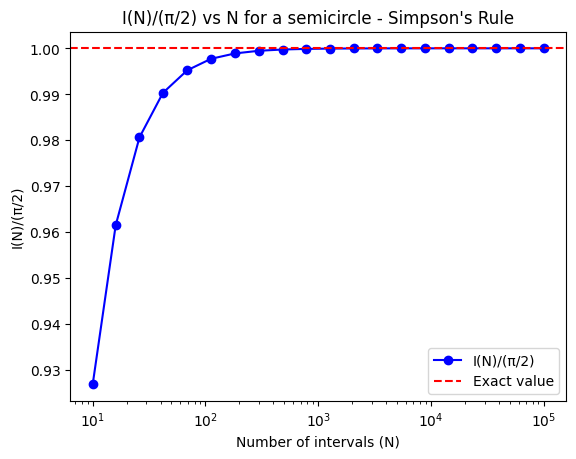

In [160]:
def f(x):
    return np.sqrt(1 - x**2)

def simpsons(f,a,b,N):
    if N%2 == 0:
        N+=1
    h = (b-a)/N
    x = np.linspace(a,b,N+1)
    y = f(x)
    S = (h/3)*(y[0] + 4*np.sum(y[1:N:2]) + 2*np.sum(y[2:N-1:2]) + y[N])
    return S

def areaRatios(N_List):
    exact_area, _ = integrate.quad(f,-1,1)
    ratios = []
    for N in N_List:
        approx_area = simpsons(f,-1,1,N)
        ratios.append(approx_area/exact_area)
        # print("Ratio:", ratios[-1])
    return ratios
# N_List = [10,100,1000,10000,100000]
N_List = np.logspace(1,5,20,dtype=int)
ratios = areaRatios(N_List)
plt.plot(N_List,ratios,marker='o', linestyle='-', color='b', label="I(N)/(π/2)")
plt.axhline(y=1, color='r', linestyle='--', label='Exact value')
plt.xscale('log')
plt.xlabel('Number of intervals (N)')
plt.ylabel('I(N)/(π/2)')
plt.title("I(N)/(π/2) vs N for a semicircle - Simpson's Rule")
plt.legend()
plt.show()



# Adaptive grid method (Task-2)

## Homework
Generic idea is the following:
1. $x_0 = a$ and set $i=0$
2. for $ x_i < b$, do the following:
     1. $h_i = ?$ ; choose $h_i$ inversely proportional to absolute value of the derivative, $|f^\prime(x_i)|$
     2. $x_{i+1} = x_{i} + h_i$
     3. compute the contribution of this interval to integral
     3. check $x_{i+1} < b$, if yes end of the interval reached; else increase $i$

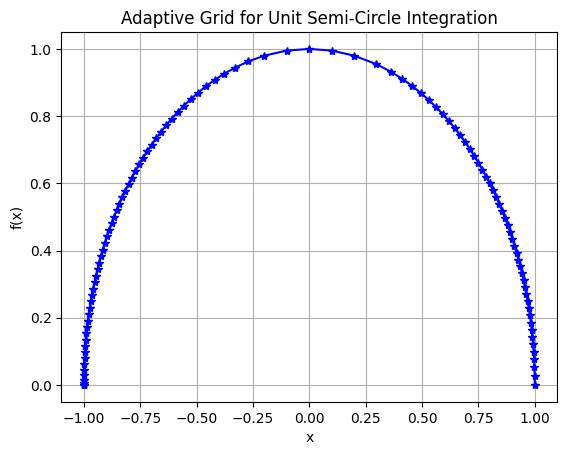

Exact Integration Area: 1.5707963267948983
Adaptive Integration Area: 1.5701133472404682
Ratio I(N)/(π/2): 0.999565201711527


In [161]:
#doing the adaptive grid scheme for a semi-circle

def f(x):
    return np.sqrt(1 - x**2)

def df(x):
    if abs(x) >= 1:
        return 1e9 
    return abs(-x / np.sqrt(1 - x**2))


def adaptiveInt(f, a, b):
    xVals = [a]
    integral = 0.00
    while xVals[-1] < b:
        dfVal = df(xVals[-1])
        h_i = min(0.1, max(1e-10, 0.02 / (dfVal))) 
        x_iPlus1 = xVals[-1] + h_i

        if (x_iPlus1 > b):
            x_iPlus1 = b
            h_i = x_iPlus1 - xVals[-1]

        #using trapezoidal rule for integration
        integral += 0.5 * h_i * (f(xVals[-1]) + f(x_iPlus1))
        xVals.append(x_iPlus1)
    
    return integral, np.array(xVals)


exact_area, _ = integrate.quad(f,-1,1)
adaptive_area, xVals = adaptiveInt(f,-1,1)

plt.plot(xVals, f(xVals), marker='*', linestyle='-', color='b')
# for x in xVals:
#     plt.axvline(x=x, color = 'black', linestyle='--', linewidth=0.5)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.title('Adaptive Grid for Unit Semi-Circle Integration')
plt.show()

ratio = adaptive_area/exact_area
print(f"Exact Integration Area: {exact_area}")
print(f"Adaptive Integration Area: {adaptive_area}")
print(f"Ratio I(N)/(π/2): {ratio}")



# Task-3  
Area of quarter circle using naive Monte Carlo


Consider a unit square. Generate $N$ random points _inside_ this square. Consider the quarter circle (or any other shape) that is completely inside the square. We can estimate the are of the quarter circle by using the probilistic argument that the ratio of areas of quarter circle and square equals the fraction of points that lie inside the quarter circle. That is:
$$ \frac{A_c}{A_s} = \lim_{N_s \rightarrow\infty}\frac{N_c}{N_s}
$$
where subsrcipt $c$ and $s$ are used to denote properties of quarter-circle and square respectively; and $A$ stands for area and $N$ stands for number of points



1. function ComputeQuarterCircleArea(num_random_pts)
2. for each pt in range(num_random_pts):
        set pt = (random x, random y)
        check if pt is inside the circle
3. Estimate area of the quarter cicle.


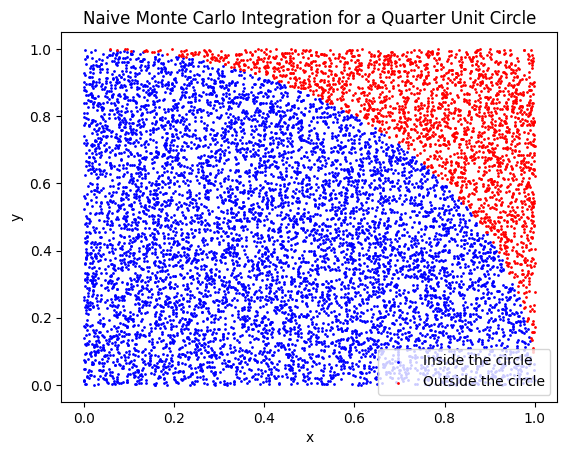

Exact area of the quarter unit circle:0.7853981633974481
Estimated area of the quarter unit circle using naive MC:0.7753


In [162]:
def naiveMC(N):
    x = np.random.uniform(0,1,N)
    y = np.random.uniform(0,1,N)

    #creating mask
    mask = x**2 + y**2 <= 1 #inside the unit circle includes the boundary
    N_inside = np.sum(mask)
    area = N_inside/N #area of square = 1
    return area, x,y,mask

N = 10000
areaEst, x, y, mask = naiveMC(N)
plt.scatter(x[mask],y[mask],color='blue',s=1, label="Inside the circle")
plt.scatter(x[~mask],y[~mask],color='red',s=1, label="Outside the circle")
plt.xlabel('x')
plt.ylabel('y')
plt.title('Naive Monte Carlo Integration for a Quarter Unit Circle')
plt.legend()
plt.show()


areaExact = integrate.quad(f,0,1)[0]
print(f"Exact area of the quarter unit circle:{areaExact}")
print(f"Estimated area of the quarter unit circle using naive MC:{areaEst}")

### Task 4.1: Compute area of circle with $\rho(x)=\text{constant}$

1. MonteCarlo_Uniform(f,a,b,num_points): to integrate f in x in [a,b] using num_point samples of uniform distribution


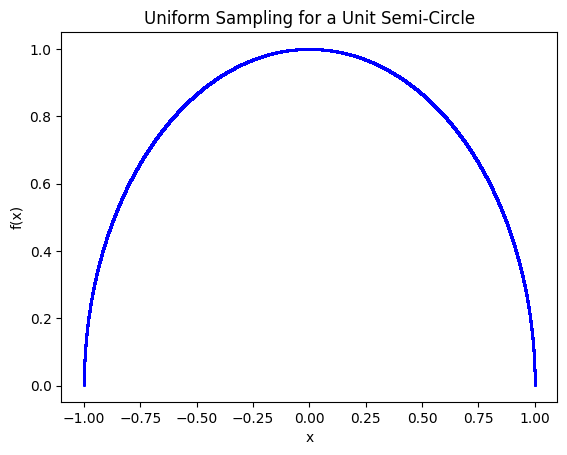

Estimated Area using Uniform Sampling: 3.1389130681284447
Expected Area (π): 3.1415926535897967


In [163]:
def f(x):
    return np.sqrt(1 - x**2)

def constMC(f,a,b,N):
    x = np.random.uniform(a,b,N)
    return (b-a)*np.mean(f(x)), x, f(x)


N = 1000000

areaU, xU, fU = constMC(f,-1,1,N)
areaU *= 2


# plt.plot(xU,f(xU),color='black', label="f(x)- semi-circle")
plt.scatter(xU,fU,color='blue',s=1, label="Uniform Sampling")
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Uniform Sampling for a Unit Semi-Circle')
plt.show()




print(f"Estimated Area using Uniform Sampling: {areaU}")
print(f"Expected Area (π): {2*(integrate.quad(f,-1,1)[0])}")
    

## Task 4.2: Similar to  Task 4.1
### Compute the are of the circle with $\rho(x)$ being the Gaussian distribution (i.e. normal distribution)




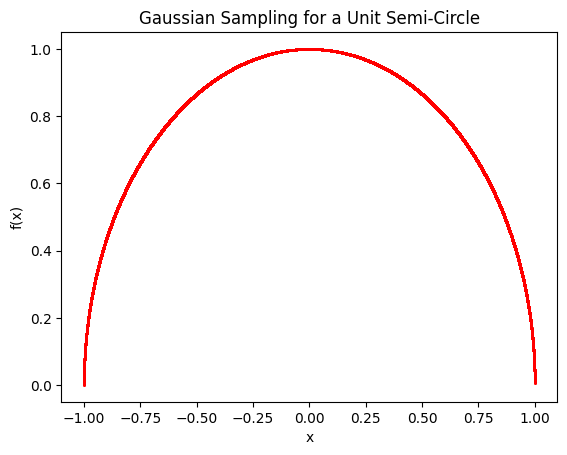

Estimated Area using Gaussian Sampling: 3.141192769847379
Expected Area (π): 3.1415926535897967


In [164]:
def f(x):
    return np.sqrt(1 - x**2)

def gaussMC(f,a,b,N,mu=0,sigma=1):
    x = np.random.normal(mu,sigma,N)
    x = x[(x>=a) & (x<=b)]
    if len(x) == 0:
        return 0
    
    return np.mean(f(x) / stats.norm.pdf(x,mu,sigma))*integrate.quad(lambda t: stats.norm.pdf(t, mu, sigma), a, b)[0], x, f(x) # have to reweigh sample after filtering for a,b

N = 1000000
areaG, xG, fG = gaussMC(f,-1,1,N,mu=0,sigma=0.5)
areaG *= 2

# plt.plot(x,f(xG),color='black', label="f(x)- semi-circle")
plt.scatter(xG,fG,color='red',s=1, label="Gaussian Sampling")
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Gaussian Sampling for a Unit Semi-Circle')
plt.show()

print(f"Estimated Area using Gaussian Sampling: {areaG}")
print(f"Expected Area (π): {2*(integrate.quad(f,-1,1)[0])}")

# Task 5: Compute error(N) for various N, for computing area of circle using Monte Carlo methods
1. Naive Monte Carlo
2. Importance sampling with uniform distribution
3. Importance sampling with gaussian distribution

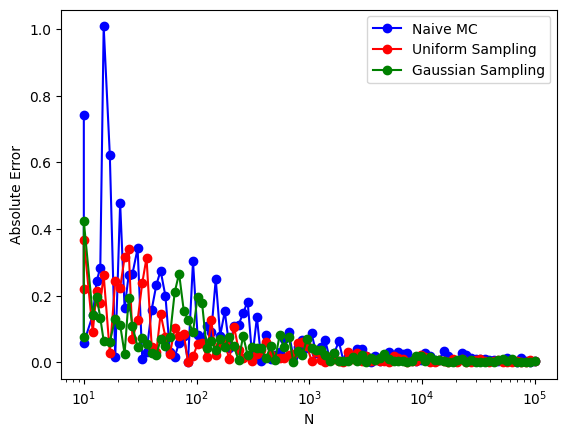

In [165]:
errorN = []
errorU = []
errorG = []

N_List = np.logspace(1,5,100,dtype=int)
for N in N_List:
    areaN, _, _, _ = naiveMC(N)
    areaN *= 4
    errorN.append(abs(areaN - 2*integrate.quad(f,-1,1)[0]))

    areaU, _, _ = constMC(f,-1,1,N)
    areaU *= 2
    errorU.append(abs(areaU - 2*integrate.quad(f,-1,1)[0]))

    areaG, _, _ = gaussMC(f,-1,1,N,mu=0,sigma=0.5)
    areaG *= 2
    errorG.append(abs(areaG - 2*integrate.quad(f,-1,1)[0]))

plt.plot(N_List,errorN,marker='o', linestyle='-', color='b', label="Naive MC")
plt.plot(N_List,errorU,marker='o', linestyle='-', color='r', label="Uniform Sampling")
plt.plot(N_List,errorG,marker='o', linestyle='-', color='g', label="Gaussian Sampling")
plt.xlabel('N')
plt.ylabel('Absolute Error')
plt.xscale('log')
plt.legend()
plt.show()